# Lungs Cancer Classification

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib as mlb
import matplotlib.pyplot as plt


df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/cancer.csv")

df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Набор данных по онкологическим заболеваниям легких
Кратко о наборе данных:

Этот набор данных содержит информацию о пациентах с раком легких, включая их возраст, пол, воздействие загрязнения воздуха, употребление алкоголя, аллергия на пыль, профессиональные вредности, генетический риск, хронические заболевания легких, сбалансированное питание, ожирение, статус курильщика, статус пассивного курильщика, боль в груди, кашель с кровью, уровень усталости, потеря веса, одышка, хрипы, затрудненное глотание, бугристость ногтей, частые простуды, сухой кашель и храп. Анализируя эти данные, мы можем получить представление о том, что вызывает рак легких и как его лучше лечить.
### Колонки:
- Возраст: Возраст пациента. (Числовое значение)
- Пол: Пол пациента. (Категорический)
- Загрязнение воздуха: Уровень воздействия загрязнения воздуха на пациента. (Категорический)
- Употребление алкоголя: Уровень употребления алкоголя пациентом. (Категорический)
- Аллергия на пыль: Уровень аллергии на пыль у пациента. (Категорический)
- Профессиональные риски: Уровень профессиональных рисков пациента. (Категорический)
- Генетический риск: уровень генетического риска пациента. (Категорический)
- Хроническое заболевание легких: Уровень хронического заболевания легких у пациента. (Категорический)
- Сбалансированная диета: Уровень сбалансированного питания пациента. (Категорический)
- Ожирение: Уровень ожирения пациента. (Категорический)
- Курение: Уровень курения пациента. (Категорический)
- Пассивный курильщик: Уровень пассивного курильщика пациента. (Категорический)
- Боль в груди: уровень боли в груди у пациента. (Категорический)
- Кашель с кровью: Уровень кашля с кровью у пациента. (Категорический)
- Усталость: Уровень усталости пациента. (Категорический)
- Потеря веса: уровень потери веса пациента. (Категорический)
- Одышка: Уровень одышки у пациента. (Категорический)
- Хрипящее дыхание: Уровень хрипов у пациента. (Категорический)
- Затрудненное глотание: Уровень трудности глотания у пациента. (Категорический)
- Бугристость ногтей на пальцах: Уровень заломов ногтей на пальцах пациента. (Категорический)
- Частые простуды: Уровень частотности заболевания простудой у пациентов. (Категорический)
- Сухой кашель: Уровень сухого кашля у пациентов. (Категорический)
- Храп: Уровень храпа у пациентов. (Категорический)
### Цель:
- Уровень: Уровень тяжести рака, которая есть у пациента (низкая, средняя или высокая).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## Описательная статистика

In [ ]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
df_c = df.copy()

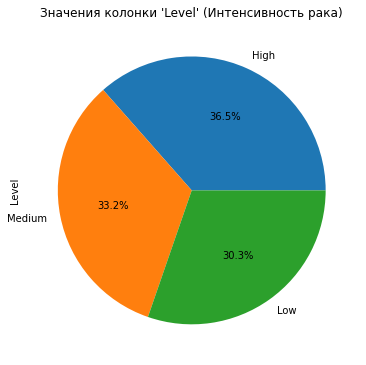

In [ ]:
plt.figure(figsize=(6,7))
plt.title("Значения колонки 'Level' (Интенсивность рака)")
round(df["Level"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')
plt.rcParams['font.size'] = '16'

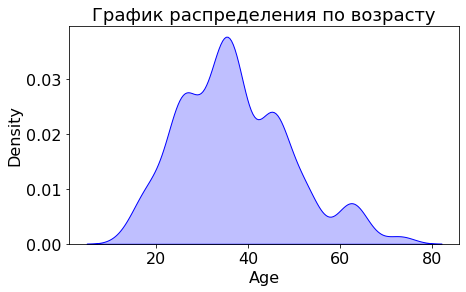

In [ ]:
plt.figure(figsize = (7,4))
sbs.kdeplot(df.Age, shade = True, color = "b")
plt.title("График распределения по возрасту", fontsize = 18)
plt.show()

## Классификация: Посмотрим какие возрастные группы чаще употребляли алкоголь:

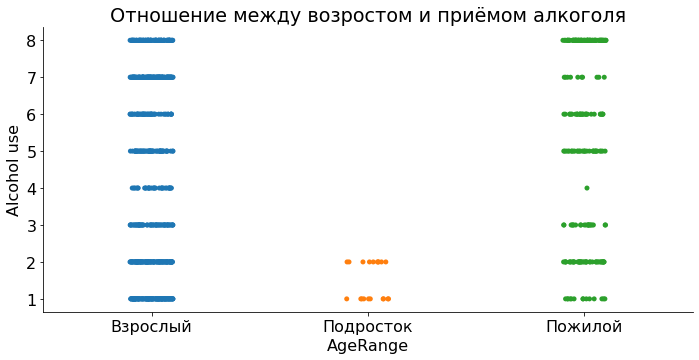

In [ ]:
df1= df.copy()

df1['AgeRange'] = None
df1.loc[(df1['Age'] > 14) & (df1["Age"] < 18), 'AgeRange'] = "Подросток"
df1.loc[(df1['Age'] > 18) & (df1["Age"] < 45), 'AgeRange'] = "Взрослый"
df1.loc[(df1['Age'] > 45), 'AgeRange'] = "Пожилой"


sbs.catplot(data=df1, x="AgeRange", y="Alcohol use", aspect=2, height=5).set(title='Отношение между возростом и приёмом алкоголя')
plt.rcParams['font.size'] = '16'

Взрослые - это большинство людей, употребляющих алкоголь ( 18 < Взрослые < 45 )

## Корреляция

In [ ]:
df1 = df.drop(["Level","Patient Id","index"],axis=1)

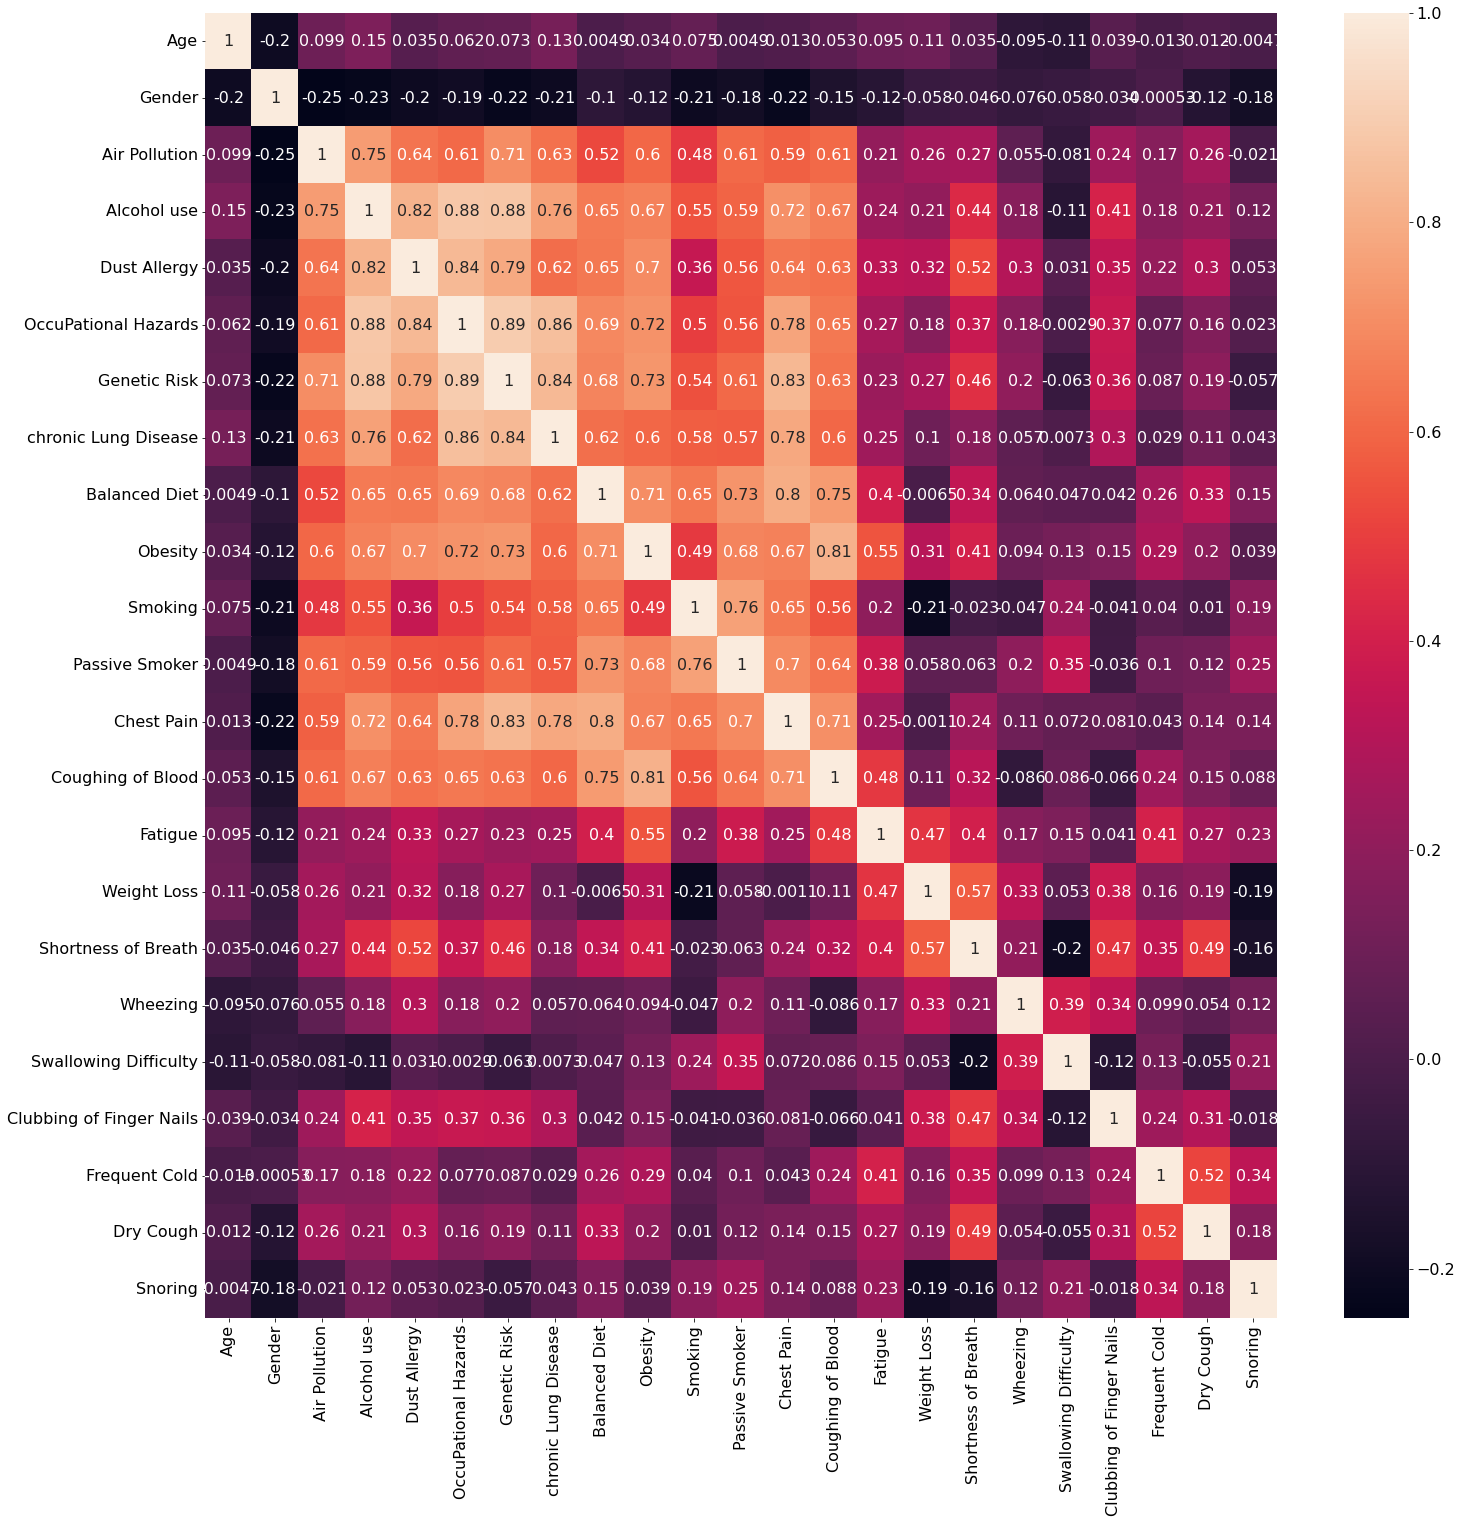

In [ ]:
plt.subplots(figsize = (24, 24))
sbs.heatmap(df1.corr(), annot = True)
plt.rcParams['font.size'] = '16'

На тепловой карте мы можем наблюдать сильную корреляцию с раком лёгких таких факторов как: ожирение, загрязнение воздуха, профессиональные опасности, сбалансированное питание, кашель с кровью, боль в груди, пассивное курение.

Рассмотрим основные корреляции:

Как ожирение влияет на уровень крови в кашле?

In [ ]:
labels = {
    0: "чрезвычайно низкий",
    1: "очень низкий",
    2: "низкий",
    3: "ниже среднего",
    4: "средний",
    5: "выше среднего",
    6: "высокий",
    7: "очень высокий",
    8: "чрезвычайно высокий"
}
labels_for_orders = ["чрезвычайно низкий", "очень низкий", "низкий", "ниже среднего", "средний", "выше среднего", "высокий", "очень высокий", "чрезвычайно высокий"]

## Как влияет генетический риск на хроническое заболевание лёгких?

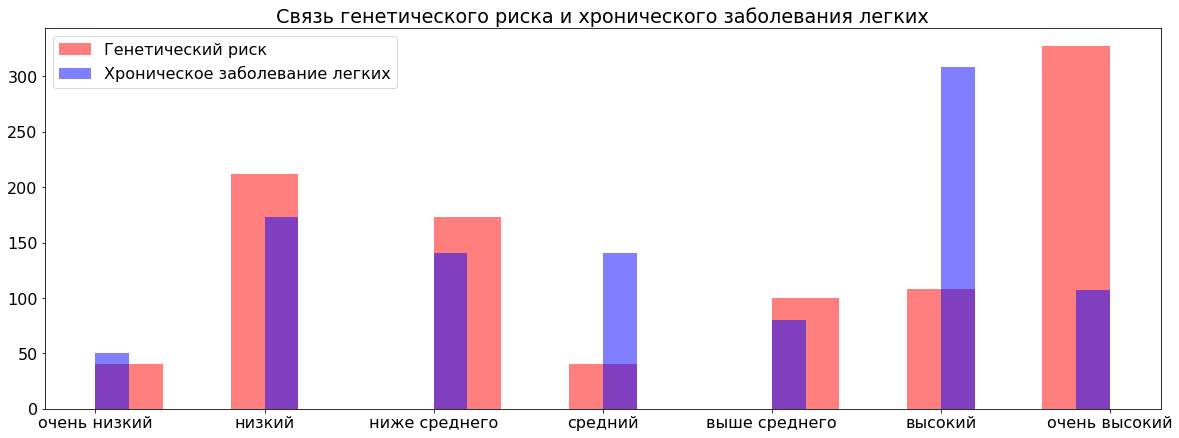

In [ ]:
plt.subplots(figsize=(20, 7))

plt.hist(df_c['Genetic Risk'], bins=15, alpha=0.5, color='red')
plt.hist(df_c['chronic Lung Disease'], bins=30, alpha=0.5, color='blue')

plt.title("Связь генетического риска и хронического заболевания легких")
  
plt.legend(['Генетический риск', 
            'Хроническое заболевание легких'])
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=labels_for_orders[1:-1])

plt.rcParams['font.size'] = '16'

Как мы можем видеть, что связи между генетическим риском и хроническим заболеванием лёгких не наблюдается.

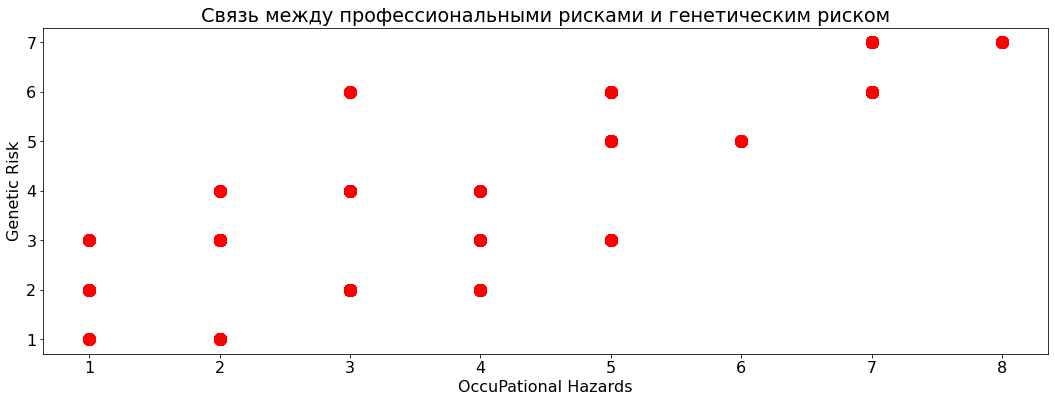

In [ ]:
f = plt.figure(figsize=(18, 6))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Связь между профессиональными рисками и генетическим риском")
plt.rcParams['font.size'] = '16'
plt.scatter(df["OccuPational Hazards"],df["Genetic Risk"],alpha=0.7,c="red",linewidths=7)

## Кто более восприимчив к болезням?

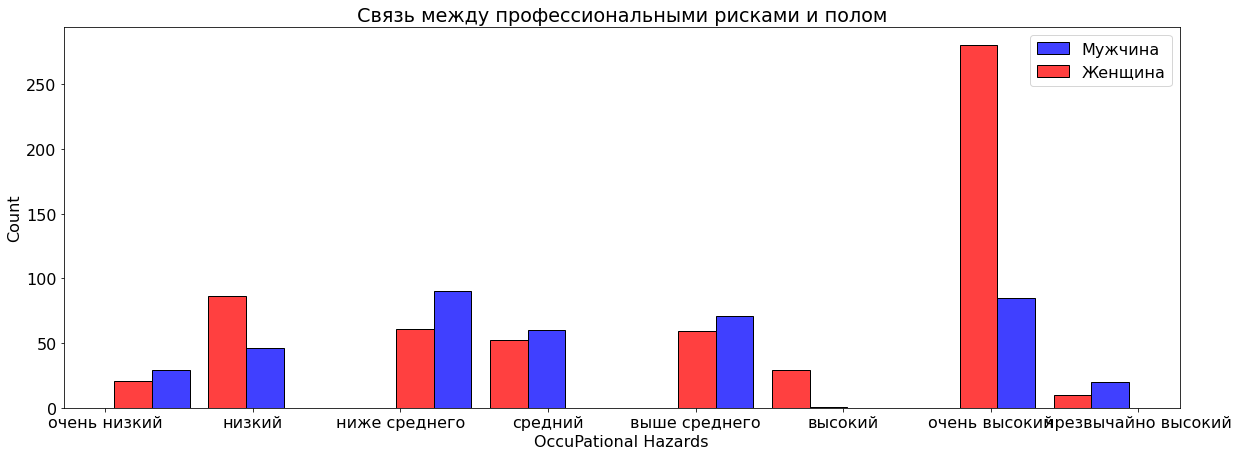

In [ ]:
plt.subplots(figsize=(20, 7))

sbs.histplot(data=df_c, x=df_c["OccuPational Hazards"], hue=df_c["Gender"], multiple="dodge", shrink=.8 ,palette=["red","blue"]).set(title='Связь между профессиональными рисками и полом')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8], labels=labels_for_orders[1:])
plt.legend(["Мужчина", "Женщина"])

Женщины более склонны к заболеваниям легких с высоким коэффициентом по сравнению с мужчинами.

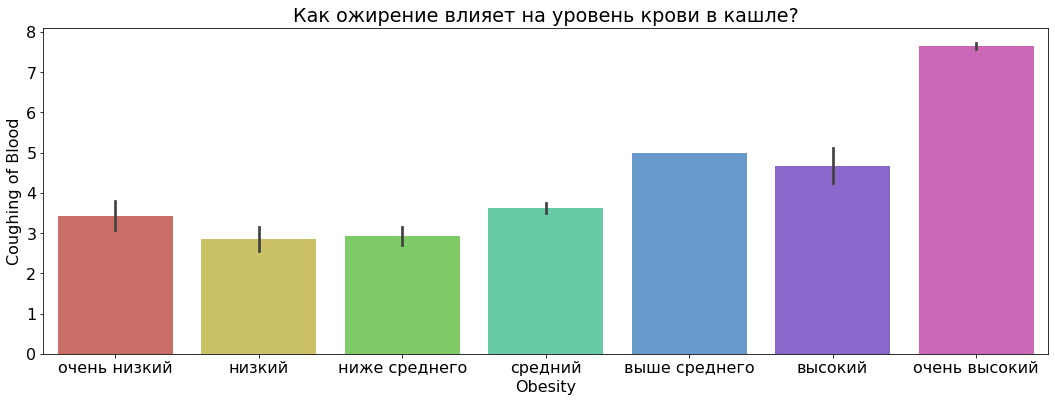

In [ ]:
df_c["Obesity"] = df_c["Obesity"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])

plt.figure(figsize=(18, 6))
plt.title("Как ожирение влияет на уровень крови в кашле?")
sbs.barplot(data=df_c, x="Obesity", y="Coughing of Blood", palette="hls", order=labels_for_orders[1:-1])

Как и ожидалось, люди с высоким ожирением, как правило, чаще кашляют кровью

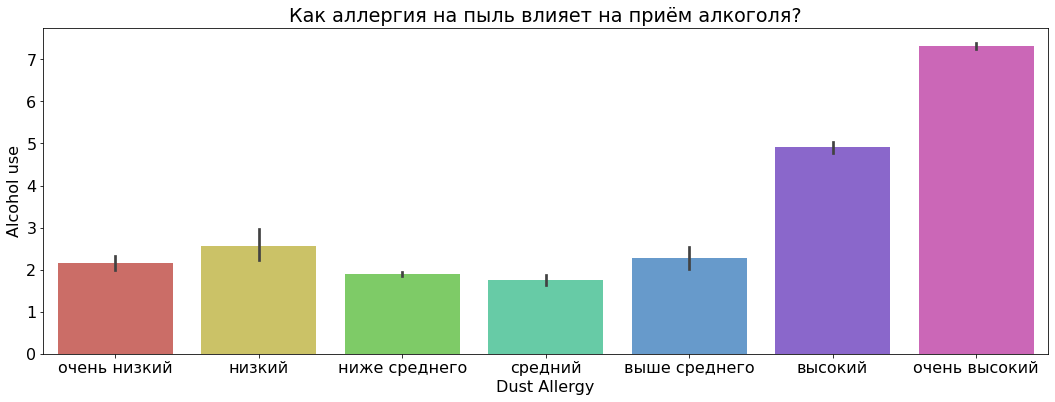

In [ ]:
df["Dust Allergy"] = df["Dust Allergy"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])

plt.figure(figsize=(18, 6))
plt.title("Как аллергия на пыль влияет на приём алкоголя?")
sbs.barplot(data=df, x="Dust Allergy", y="Alcohol use", palette="hls", order=labels_for_orders[1:-1])

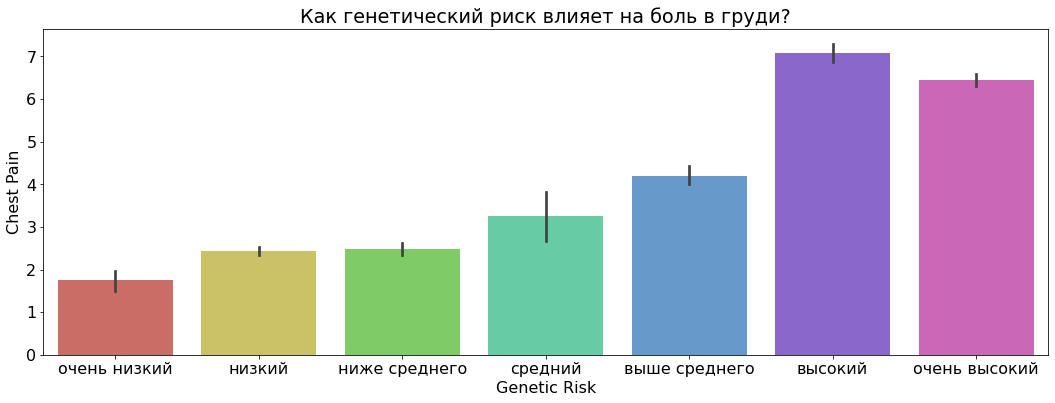

In [ ]:
df["Genetic Risk"] = df["Genetic Risk"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
plt.figure(figsize=(18, 6))
plt.title("Как генетический риск влияет на боль в груди?")
sbs.barplot(data=df, x="Genetic Risk", y="Chest Pain", palette="hls", order=labels_for_orders[1:-1])